In [1]:
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-vector-stores-qdrant

You should consider upgrading via the '/Users/arjiv_admin/Desktop/Multimodel/myenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached protobuf-5.27.2-cp38-abi3-macosx_10_9_universal2.whl (412 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.4
    Uninstalling protobuf-4.25.4:
      Successfully uninstalled protobuf-4.25.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.26.0 requires protobuf<5.0,>=3.19, but you have protobuf 5.27.2 which is incompatible.
You should consider upgrading via the '/Users/arjiv_admin/Desktop/Multimodel/myenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import logging
import sys
import os
 
import qdrant_client
from IPython.display import Markdown, display
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import StorageContext
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.embeddings.fastembed import FastEmbedEmbedding
from llama_index.core import Settings
 
Settings.embed_model = FastEmbedEmbedding(model_name="BAAI/bge-base-en-v1.5")
 

/Users/arjiv_admin/Desktop/Multimodel/myenv/lib/python3.9/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  )
Fetching 5 files: 100%|██████████| 5/5 [00:44<00:00,  8.85s/it]


In [2]:
%pip install llama_index ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install -U qdrant_client

You should consider upgrading via the '/Users/arjiv_admin/Desktop/Multimodel/myenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/y8/y2lrp6t51wz4np0f_f4kstnh0000gq/T/pip-req-build-mcgqp5zz
  Running command git clone -q https://github.com/openai/CLIP.git /private/var/folders/y8/y2lrp6t51wz4np0f_f4kstnh0000gq/T/pip-req-build-mcgqp5zz
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
Using legacy 'setup.py install' for clip, since package 'wheel' is not installed.
    Running setup.py install for clip ... done
You should consider upgrading via the '/Users/arjiv_admin/Desktop/Multimodel/myenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/arjiv_admin/Desktop/Multimodel/myenv/bin/python -m pip i

In [ ]:
from dotenv import load_dotenv
import os 
load_dotenv('myenv/.env')

True

In [16]:
# set up OpenAI
import os
import openai

OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY')
openai.api_key = OPENAI_API_KEY
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [14]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import SimpleDirectoryReader, StorageContext

import qdrant_client
from llama_index.core import SimpleDirectoryReader


# Create a local Qdrant vector store
client = qdrant_client.QdrantClient(location= ":memory:")

text_store = QdrantVectorStore(
    client=client, collection_name="text_collection"
)
image_store = QdrantVectorStore(
    client=client, collection_name="image_collection"
)
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader("/Users/arjiv_admin/Desktop/Multimodel/JP Morgan Financial Reports").load_data()
index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

# Save it
# index.storage_context.persist(persist_dir="./storage")

# # Load it
from llama_index.core import load_index_from_storage

# storage_context = StorageContext.from_defaults(
#     vector_store=text_store, persist_dir="./storage"
# )
# index = load_index_from_storage(storage_context, image_store=image_store)

In [23]:
query = "what was the tangible book value in 2015"
retriever_engine = index.as_retriever(similarity_top_k=3, image_similarity_top_k=1)

# Use the retriever engine to retrieve results for the given query
retrieval_results = retriever_engine.retrieve(query)
retrieval_results

[NodeWithScore(node=TextNode(id_='bb0853cd-3704-4806-8ec2-e5c2ad26653f', embedding=None, metadata={'page_label': '4', 'file_name': '2015-annualreport.pdf', 'file_path': '/Users/arjiv_admin/Desktop/Multimodel/JP Morgan Financial Reports/2015-annualreport.pdf', 'file_type': 'application/pdf', 'file_size': 7019509, 'creation_date': '2024-07-25', 'last_modified_date': '2024-07-25'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='0bbf497d-2c1e-4ff9-874f-9d2c6c77d0ab', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '4', 'file_name': '2015-annualreport.pdf', 'file_path': '/Users/arjiv_admin/Desktop/Multimodel/JP Morgan Financial Reports/2015-annualreport.pdf', 'file_type': 'application/pdf', 'file_

In [18]:
import fitz 
import io 
from PIL import Image 
import os
import json
import matplotlib.pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [24]:
def plot_images(image_paths):
    # Initialize a counter to track the number of images shown
    images_shown = 0
    # Set the figure size for the entire plot
    plt.figure(figsize=(16, 9))
    # Iterate through each image path in the provided list
    for img_path in image_paths:
        # Check if the file exists
        if os.path.isfile(img_path):
            # Open the image using the Image module
            image = Image.open(img_path)
            # Create a subplot for the current image in a 2x3 grid
            plt.subplot(2, 3, images_shown + 1)
            # Display the image in the subplot
            plt.imshow(image)
            # Remove x and y ticks for clarity
            plt.xticks([])
            plt.yticks([])
            # Increment the counter for images shown
            images_shown += 1
            # Break the loop if 9 images have been shown
            if images_shown >= 9:
                break



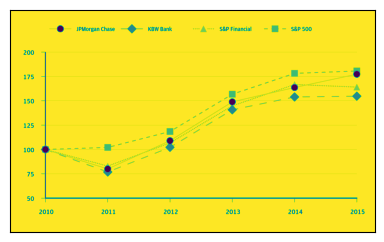

In [25]:
image_paths = [
    retrieval_results[i].metadata['file_path']
    for i in range(len(retrieval_results))
    if retrieval_results[i].metadata['file_type'] == 'image/png'
]
# plot the retrieved images
plot_images(image_paths)

In [26]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("JP Morgan Financial Reports").load_data()

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o", api_key=OPENAI_API_KEY, max_new_tokens=1500
)


In [33]:
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import SimpleMultiModalQueryEngine

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    llm=openai_mm_llm, text_qa_template=qa_tmpl
)

query_str = "what is the quarterly growth rate for credit in year 2015"
response = query_engine.query(query_str)

In [34]:
print(response)

The provided context does not contain specific information about the quarterly growth rate for credit in the year 2015. The context discusses various financial metrics and performance indicators for JPMorgan Chase & Co. in 2015, but it does not break down the quarterly growth rate for credit.

The pie charts provided show the distribution of credit card retention by state at the end of 2014 and 2015, but they do not provide information on the quarterly growth rate for credit.

To determine the quarterly growth rate for credit in 2015, you would need specific quarterly data on credit metrics, which is not included in the provided context.


In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)